---
<center>

  # **Tarea 03**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import quad
from scipy.linalg import expm
from scipy.stats import norm


In [2]:
def animar_esquema(
        numero_pasos: int, 
        matriz_video: np.ndarray,
        filename: str,
):
    """
    Genera y guarda una animación de la evolución de V usando esquema_prog_prog.

    Parámetros
    ----------
    numero_pasos : int
        Número de pasos de tiempo.
    matriz_video : np.ndarray
        Matriz que contiene las soluciones en cada paso de tiempo.
    filename : str
        Nombre del archivo de salida (GIF).
    """
    # Matriz para guardar los resultados
    V = matriz_video

    # --- Animación ---
    fig, ax = plt.subplots()
    (line,) = ax.plot(V[0, :], lw=2)
    ax.set_ylim(np.min(V), np.max(V))
    ax.grid(True)

    def update(frame):
        line.set_ydata(V[frame, :])
        return (line,)

    ani = FuncAnimation(fig, update, frames=range(numero_pasos + 1), interval=100, blit=True)

    # Guardar como GIF
    gif_name = filename + ".gif"
    ani.save(gif_name, writer=PillowWriter(fps=10))
    plt.close(fig)
    print(f"✅ Animación guardada en {filename}")

    return ani

# 1.

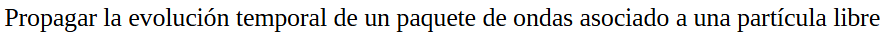

In [3]:
# Constante hbar
#hbar = 1.0545718e-34  # J·s
hbar = 1

# Definición de los parámetros del paquete de ondas
p0 = 8
x0 = -18
sigma = 0.5

# Masa de la particula
m = 1

# Numero de pasos de tiempo y de espacio
N = 200

# Variable espacial
longirud_intervalo = 20
x_prima = np.linspace(-longirud_intervalo, longirud_intervalo, N)

Tenemos que la E.D para una particula libre está dada por:

<center>

$\frac{\partial^2 \psi}{\partial x^2} + \frac{2m}{\hbar^2} E = 0 $

</center>

La evolución temporal va a estar dada por: 

<center>

$ \ket{\psi(t)} = e^{-i\hat{H}(t-t_0)/\hbar} \ket{\psi_0}$

</center>

Desarrollando el Hamiltoniano en sus autofunciones $\hat{H} \ket{\varphi} = E_n \ket{\varphi_n}  $

Con esto tenemos que el operador es:

<center>

$u(t,t_0) = \sum_n \ket{\varphi_n}\bra{\varphi_n} e^{-iE_n (t-t_0)/\hbar}   $

</center>

Donde $p= \pm \sqrt{2mE}$. Encontrando las autofunciones del momento se puede calcular la propagación del paquete de ondas, posteriormente se multiplica por la condición inicial $\psi(x',0)$ y se integra con respecto a $x'$

Para una particula libre el propagador va a ser:

<center>

$u(x,t,x',t') = (\frac{m}{2 \pi \hbar it})^{1/2} e^{im(x-x')^2/2\hbar(t-t_0)} $

</center>

En forma general el propagador queda de la forma:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|\varphi}\braket{\varphi|x} e^{-iE_n(t-t_0)/\hbar} d\varphi $

</center>

En el caso del momento:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|p}\braket{p|x} e^{-ip^2(t-t_0)/2m\hbar} dp$

</center>


Lo primero que hay que realizar es la definición del paquete de ondas. Se va a definir el paquete de ondas como una gaussiana, la cual va a tener la siguiente expresión matemática:

Paquete de ondas: $A e^{-\frac{(x- \mu)^{2}}{2\sigma^2}}$

En donde: 

* $A$: es el valor más alto del paquete de ondas.
* $\mu$: posición central del paquete de ondas, donde se ubica el centro del paquete de ondas.
* $\sigma$: que tan ancho es el paquete de ondas. 

Pauqete de ondas que este localizado en $x_0$ con un momento inicial $p_0$, la expresión matemática va a estar dada por:

<center>

$\frac{1}{\sqrt{2 \pi}\sigma} e^{-\frac{(x-x_0)^2}{2\sigma^2}} e^{i p_0x/\hbar}   $

</center>

In [4]:
def propagador(x, t, x_prima, t_prima, m, hbar):
    """
    Calcula el propagador cuántico para una partícula libre.
    
    Parámetros:
    -----------
    x : float
        Posición final
    t : float
        Tiempo final
    x_prima : float
        Posición inicial
    t_prima : float
        Tiempo inicial (t_0)
    m : float
        Masa de la partícula
    hbar : float
        Constante de Planck reducida (ℏ)
    
    Retorna:
    --------
    complex : Valor del propagador u(x, t, x', t')
    """
    
    # Diferencia temporal
    dt = t - t_prima
    
    if dt <= 0:
        raise ValueError("t debe ser mayor que t_prima")
    
    # Diferencia espacial
    dx = x - x_prima
    
    # Factor de prefactor
    prefactor = (m / (2 * np.pi * hbar * 1j * dt))**(1/2)
    
    # Exponente complejo
    exponente = 1j * m * dx**2 / (2 * hbar * dt)
    
    # Propagador completo
    u = prefactor * np.exp(exponente)
    
    return u


def psi_inicial(x_prima, x0=0, sigma=1, k0=0):
    """
    Paquete de ondas gaussiano inicial.
    
    Parámetros:
    -----------
    x_prima : float o array
        Posición
    x0 : float
        Posición central del paquete
    sigma : float
        Ancho del paquete
    k0 : float
        Momento inicial (en unidades de hbar)
    
    Retorna:
    --------
    complex : ψ(x', 0)
    """
    normalizacion = 1/(np.sqrt(2 * np.pi) * sigma)
    gaussian = np.exp(-(x_prima - x0)**2 / (2 * sigma**2))
    fase = np.exp(1j * k0 * x_prima/hbar)
    
    return normalizacion * gaussian * fase

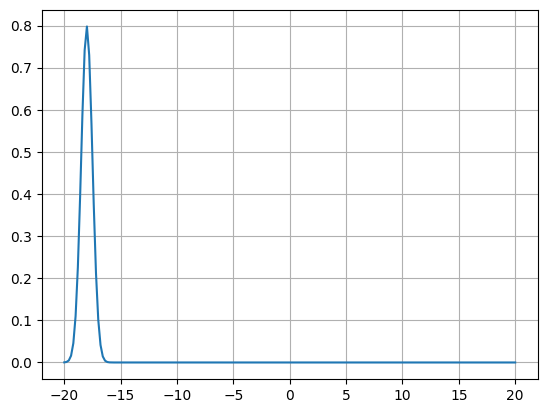

In [5]:
paquete_onda = psi_inicial(x_prima, x0,  sigma, p0)

plt.plot(x_prima, np.abs(paquete_onda))
plt.grid()
plt.show()

Una vez definido el paquete de ondas y el propagador lo único que falta por realiar es la siguiente integral con respecto a $x'$

<center>

$ \psi(x,t) = \int_{-\infty}^{\infty} u(x,t,x',0)\psi(x',0) dx' $

</center>

In [6]:
def evolucion_temporal(x, t, m, hbar, x0=0, sigma=1, k0=0, x_limits=(-50, 50)):
    """
    Calcula ψ(x, t) usando la integral del propagador.
    
    ψ(x, t) = ∫ u(x, t, x', 0) ψ(x', 0) dx'
    
    Parámetros:
    -----------
    x : float
        Posición donde evaluar ψ(x, t)
    t : float
        Tiempo
    m : float
        Masa de la partícula
    hbar : float
        Constante de Planck reducida
    x0 : float
        Posición central inicial del paquete
    sigma : float
        Ancho inicial del paquete
    k0 : float
        Momento inicial
    x_limits : tuple
        Límites de integración
    
    Retorna:
    --------
    complex : ψ(x, t)
    """
    
    def integrando_real(x_prima):
        prop = propagador(x, t, x_prima, 0, m, hbar)
        psi_0 = psi_inicial(x_prima, x0, sigma, k0)
        resultado = prop * psi_0
        return np.real(resultado)
    
    def integrando_imag(x_prima):
        prop = propagador(x, t, x_prima, 0, m, hbar)
        psi_0 = psi_inicial(x_prima, x0, sigma, k0)
        resultado = prop * psi_0
        return np.imag(resultado)
    
    # Integración numérica de partes real e imaginaria
    real_part, _ = quad(integrando_real, x_limits[0], x_limits[1], limit=100)
    imag_part, _ = quad(integrando_imag, x_limits[0], x_limits[1], limit=100)
    
    return real_part + 1j * imag_part

In [7]:
x = np.linspace(-longirud_intervalo, 4*longirud_intervalo, N)
tiempo = np.linspace(1, 8, N)

# Arreglo para guardar la evolución
evolucion = np.zeros((len(tiempo), len(x)))

In [8]:
# for i, t in enumerate(tiempo):
#     pos = i
#     # Calcular ψ(x, t) para cada posición
#     psi_t = []
#     for i in x:
#         if t == 0:
#             psi = psi_inicial(i, x0, sigma, p0)
#         else:
#             psi = evolucion_temporal(i, t, m, hbar, x0, sigma, p0)
#         psi_t.append(psi)
        
#     psi_t = np.array(psi_t)
#     densidad_prob = np.abs(psi_t)**2
#     evolucion[pos, :] = densidad_prob
    

In [9]:
# Animar y guardar el resultado
# animar_esquema(len(tiempo)-1, evolucion, "evolucion_paquete_onda_libre")

# 2.

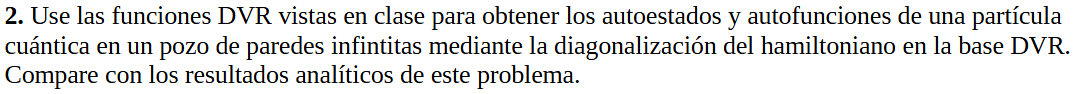

Las funciones DVR propuestas son: 

<center>

$f_n(R) = \frac{2}{\sqrt{L(N_f +1)}} \sum_{k=1}^{N_f} \sin(\frac{ k \pi (R - R_0)}{L}) \sin(\frac{k n \pi}{N_f + 1}) $

</center>

Donde: 

* $N_f$ es el numero de funciones DVR
* $R_n = \frac{nL}{N_f +1} + R_0$, es el mallado a utilizar de la función DVR
* $L$ es el tamaño del intervalo.


Con lo que la función $\psi(R) = \sum_n c_n f_n(R)$

Tenemos que para una partícula cuántica en un pozo de paredes infinitas:

* $E_n = \frac{n^2 \pi^2 \hbar^2}{2 m L^2} $
* $ \varphi_n = \sqrt{\frac{2}{L}} \sin(n \pi x / L)  $

Una propiedad impontante de las funciones DVR es que, al tener una función y hacer la proyección en las funciones DVR se van a obtener unos coeficientes y estos coeficientes van a ser la función:

<center>

$\braket{f_n(R) | \phi(R)} = \sqrt{\frac{L}{N_f + 1}} \phi(R_n) = c_n$

</center>

In [10]:
r0 = 0                          # Valor inicial de r
rmax = 20                       # Valor máximo de r
L = rmax - r0                   # Longitud del intervalo
Ndvr = 150                      # Número de funciones a utilizar
mu = 1                          # Masa reducida (en unidades atómicas)

#R = np.linspace(r0, rmax, Ndvr)

n = 10

# Malla de puntos de la función DVR
def generar_puntos(L, Nf, P0):
    """
    Genera un arreglo de puntos según la fórmula: Pn = nL/(Nf+1) + P0
    
    Parámetros:
    -----------
    L : float
        Longitud total o parámetro L
    Nf : int
        Número final de puntos (n va de 1 a Nf)
    P0 : float
        Punto inicial o valor base
    
    Retorna:
    --------
    numpy.array : Arreglo con los puntos calculados
    """
    n = np.arange(0, Nf)  # Crea n = 1, 2, 3, ..., Nf
    Pn = (n * L) / (Nf + 1) + P0
    return Pn

Rn = generar_puntos(
    L= L,
    Nf= Ndvr,
    P0= r0
)

In [11]:
# Definición de las funciones DVR
def funcion_dvr(
        R, 
        Nf, 
        L, 
        R0, 
        n
):
    """
    Calcula la función fn(R) según la fórmula DVR.
    
    Parámetros:
    -----------
    R : float o array
        Valor(es) de la coordenada R
    Nf : int
        Número de puntos de la cuadrícula (grid points)
    L : float
        Longitud del dominio
    R0 : float
        Punto inicial del dominio
    n : int
        Número de la función DVR
        
    Retorna:
    --------
    float o array
        Valor de la función fn(R)
    """
    # Factor de normalización
    factor = 2 / np.sqrt(L * (Nf + 1))
    
    # Suma sobre k desde 1 hasta Nf
    suma = 0
    for k in range(0, Nf + 1):
        # Primer término: sin(kπ(R-R0)/L)
        primer_sin = np.sin(k * np.pi * (R - R0) / L)
        
        # Segundo término: sin(kπn/(Nf+1))
        segundo_sin = np.sin(k * np.pi * n / (Nf + 1))
        
        suma += primer_sin * segundo_sin
    
    return factor * suma

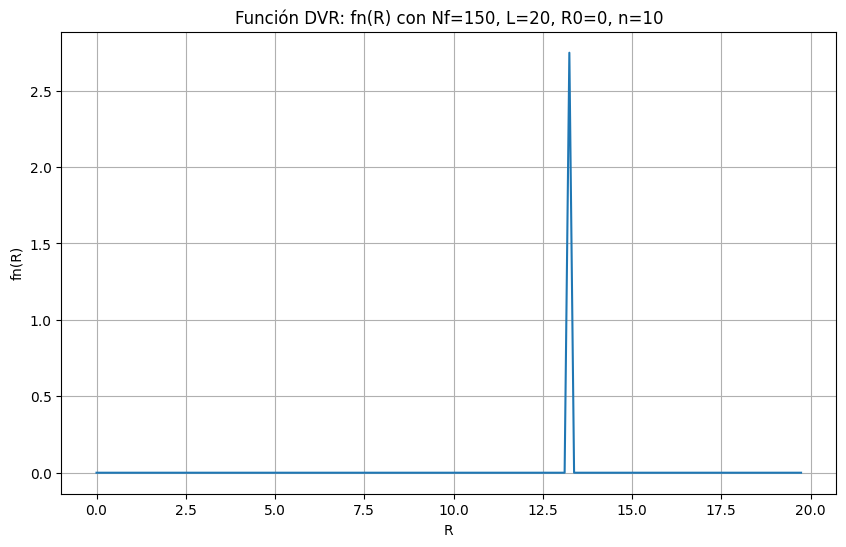

In [12]:
resultado = funcion_dvr(Rn, Ndvr, L, r0, 100)

# Graficar (opcional)
plt.figure(figsize=(10, 6))
plt.plot(Rn, resultado)
plt.xlabel('R')
plt.ylabel('fn(R)')
plt.title(f'Función DVR: fn(R) con Nf={Ndvr}, L={L}, R0={r0}, n={n}')
plt.grid(True)
plt.show()

Tenemos que las funcionees DVR cumplen con:


<center>

$\int_{-\infty}^{\infty} f_i \frac{d^2 f_j}{dR^2} dR = \frac{2 \pi^2}{(N_f + 1) L^2} \sum_{k=1}^{N_f} k^2 \sin(\frac{i k \pi}{N_f +1})\sin(\frac{j k \pi}{N_f +1}) $

</center>

Con la anterior propiedad de las funciones DVR se puede calcular la matriz del Hamiltoniano como: 

<center>

$\braket{f_i | \hat{H} | f_j}  = -\frac{\hbar^2}{2m} \braket{f_i | \frac{d^2 f_j}{dx^2}} + \delta_{ij} V(R_i)$

</center>

### Resultados analíticos del pozo de paredes infinitas

<center>

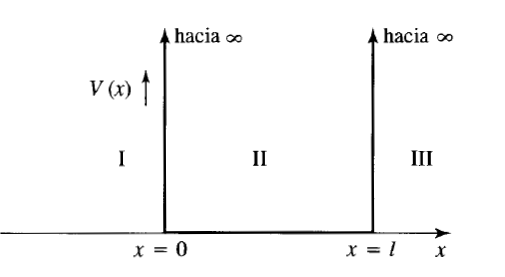

</center>

De la solución analítica para el pozo de paredes infinitas obtenemos que los valores permitidos para la energía van a ser: 

<center>

$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2}$ , donde $n=1,2,3, \dotso$

</center>

Y con autofunciones: 

<center>

$\varphi_n = \sqrt{\frac{2}{L}} \sin(\frac{n \pi x}{L})$

</center>

Autovalor E_1 = 0.01
Autovalor E_2 = 0.05
Autovalor E_3 = 0.11
Autovalor E_4 = 0.20


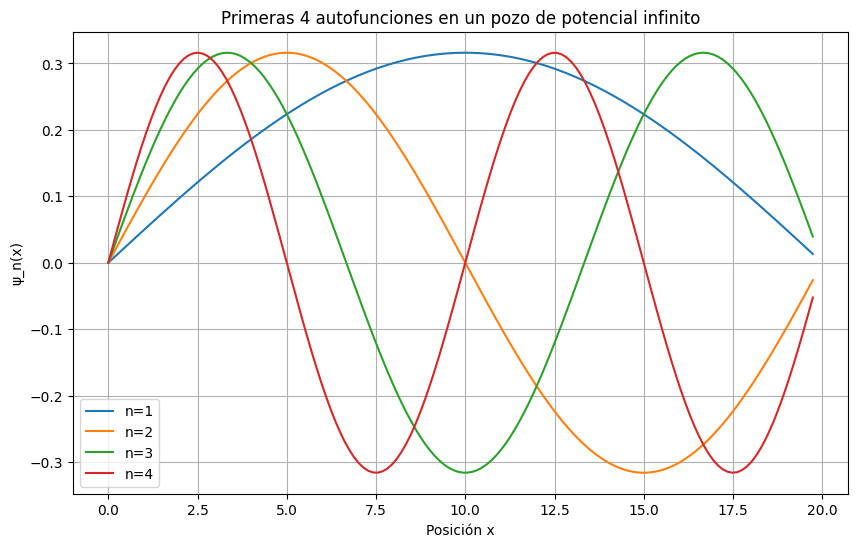

In [13]:
# Definición de las autofunciones y autovalores de una particula en un pozo con paredes infinitas
def autovalores_pozo_infinito(
        L, # Ancho del pozo 
        n, # Número cuantico (n=1,2,3,...)
):
    En = (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

    return En


def autofunciones_pozo_infinito(
        x, # Posición
        L, # Ancho del pozo
        n, # Número cuantico (n=1,2,3,...)
):
    if x < 0 or x > L:
        return 0
    else:
        psi_n = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
        return psi_n

plt.figure(figsize=(10, 6))
for n in range(1, 5):
    psi_n = [autofunciones_pozo_infinito(xi, L, n) for xi in Rn] 
    plt.plot(Rn, psi_n, label=f'n={n}')
    En = autovalores_pozo_infinito(L, n)
    print(f'Autovalor E_{n} = {En:.2f}')
plt.title('Primeras 4 autofunciones en un pozo de potencial infinito')
plt.xlabel('Posición x')
plt.ylabel('ψ_n(x)')
plt.legend()
plt.grid()
plt.show()
    

Autovalor E_1 = 0.01 unidades de energía
Autovalor E_2 = 0.05 unidades de energía
Autovalor E_3 = 0.11 unidades de energía


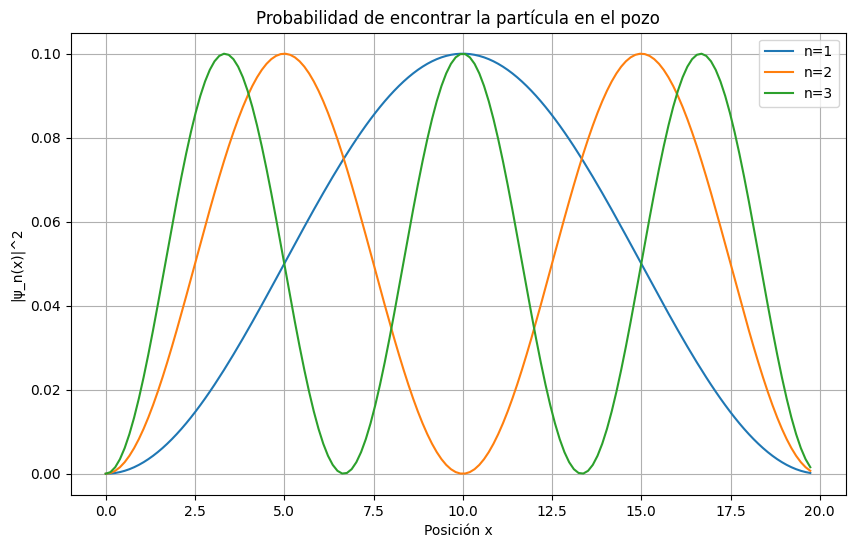

In [14]:
# Grafica la probabilidad de encontrar la particula en el pozo
plt.figure(figsize=(10, 6))
for n in range(1, 4):
    abs_psi_n = [autofunciones_pozo_infinito(xi, L, n) * autofunciones_pozo_infinito(xi, L, n) for xi in Rn]
    plt.plot(Rn, abs_psi_n, label=f'n={n}')
    En = autovalores_pozo_infinito(L, n)
    print(f'Autovalor E_{n} = {En:.2f} unidades de energía')
plt.title('Probabilidad de encontrar la partícula en el pozo')
plt.xlabel('Posición x')
plt.ylabel('|ψ_n(x)|^2')
plt.legend()
plt.grid()
plt.show()

### Calculo de termino cinetico del Hamiltoniano

In [15]:
# Arreglo del Hamiltoniano
H = np.zeros((Ndvr, Ndvr))

# Termino cinetico del Hamiltoniano en DVR
def termino_cinetico(i, j):
    # Constante del termino cinetico del Hamiltoniano en DVR
    const_cinetico = (np.pi**2) / ((Ndvr + 1) * L**2)
    # Suma sobre k desde 1 hasta Nf
    suma = 0
    for k in range(0, Ndvr + 1):
        # Primer término: sin(kπ(R-R0)/L)
        primer_sin = k**2 * np.sin((k * np.pi * i) / (Ndvr + 1))
        
        # Segundo término: sin(kπn/(Nf+1))
        segundo_sin = np.sin(k * np.pi * j / (Ndvr + 1))
        
        suma += primer_sin * segundo_sin
    
    return const_cinetico * suma

# Calculo de termino cinetico del Hamiltoniano
for i in range(Ndvr):
    for j in range(i, Ndvr):
        H[i, j] = termino_cinetico(i+1, j+1)

        # Ya que el Hamiltoniano es un operador hermitico, este va a ser simetrica
        H[j,i] = H[i, j]
    

In [16]:
autovalores_H, autovectores_H = np.linalg.eigh(H, UPLO="L")

print("Comparación de los autovalores del Hamiltoniano con los valores esperados:")
for n in range(1, 20):
    En = autovalores_pozo_infinito(L, n)
    print(f"E_{n} análitica = {En:.4f} \tE_{n} calculada con DVR = {autovalores_H[n-1]:.4f}")
    error_aproximacion = np.abs((En - autovalores_H[n-1])/ En) * 100
    print(f"Porcentaje de error obtenido: {error_aproximacion:.4f} %")
    print("---"*20)


Comparación de los autovalores del Hamiltoniano con los valores esperados:
E_1 análitica = 0.0123 	E_1 calculada con DVR = 0.0123
Porcentaje de error obtenido: 0.0000 %
------------------------------------------------------------
E_2 análitica = 0.0493 	E_2 calculada con DVR = 0.0493
Porcentaje de error obtenido: 0.0000 %
------------------------------------------------------------
E_3 análitica = 0.1110 	E_3 calculada con DVR = 0.1110
Porcentaje de error obtenido: 0.0000 %
------------------------------------------------------------
E_4 análitica = 0.1974 	E_4 calculada con DVR = 0.1974
Porcentaje de error obtenido: 0.0000 %
------------------------------------------------------------
E_5 análitica = 0.3084 	E_5 calculada con DVR = 0.3084
Porcentaje de error obtenido: 0.0000 %
------------------------------------------------------------
E_6 análitica = 0.4441 	E_6 calculada con DVR = 0.4441
Porcentaje de error obtenido: 0.0000 %
--------------------------------------------------------

### Dibujo de las autofunciones

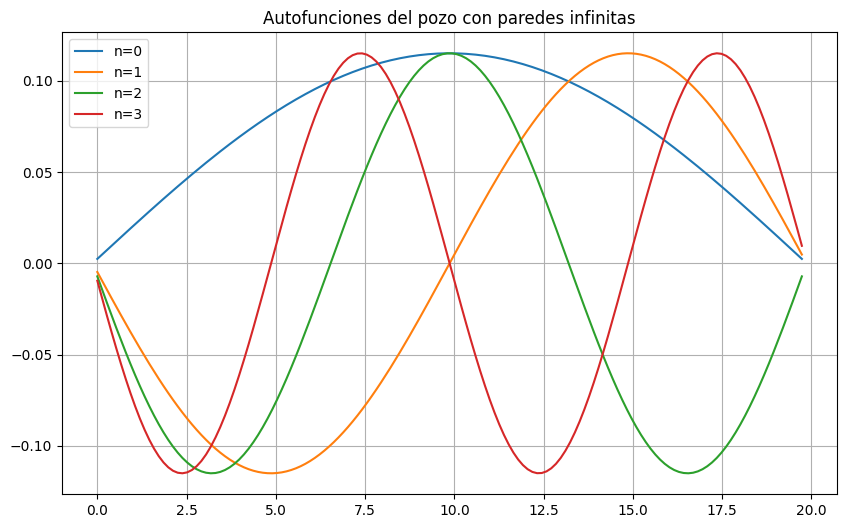

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(0, 4):
    plt.plot(Rn,  autovectores_H[:,i], label=f'n={i}')
    #plt.plot(Rn,  autovectores_H[:,i] * autovectores_H[:,i], label=f'n={i}')
plt.title("Autofunciones del pozo con paredes infinitas")
plt.legend()
plt.grid()
plt.show()

# 3.

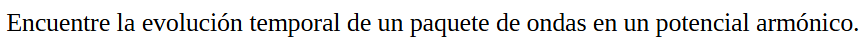

Para el caso del oscilador se puede utilizar las funciones DVR, con lo que solo toca realizar el cambio en la función del potencial. Esto sería:

<center>

$\braket{f_i | \hat{H} | f_j}  = -\frac{\hbar^2}{2m} \braket{f_i | \frac{d^2 f_j}{dx^2}} + \delta_{ij} V(R_i)$

</center>

En donde la fucnión para $V(R_i)$ va a estar dada por:

<center>

$V(R_i) = \frac{1}{2}(R - \frac{L}{2})^2$

</center>

Con lo que la matriz del Hamiltoniano resultante solo se debe sumar en la diagonal el valor correspondinete al potencial de un oscilador armónico.

In [18]:
# Calcular la longitud de la matriz del hamiltoniano 
len_diag = len(np.diag(H))

print(f"La longitud de la matriz del Hamiltoniano es: {len_diag}")

La longitud de la matriz del Hamiltoniano es: 150


In [19]:
# Definición del potencial del oscilador armónico
def potencial_oscilador_armonico(R):
    """
    Potencial del oscilador armónico: V(R) = 0.5 * (R - L/2)^2
    
    Parámetros:
    -----------
    R : float o array
        Posición(es)
    k : float
        Constante del resorte (por defecto k=1)
    
    Retorna:
    --------
    float o array
        Valor del potencial V(R)
    """
    return 0.5 *(R - L/2)**2

# Modificación del Hamiltoniano para incluir el potencial del oscilador armónico
H_osc = np.copy(H)

for i in range(0, len_diag):
    H_osc[i, i] += potencial_oscilador_armonico(Rn[i])

# Cálculo de los nuevos autovalores y autovectores
autovalores_osc, autovectores_osc = np.linalg.eigh(H_osc)


In [20]:
for i in range(0, 150):
    print(f"La energía del estado n({i}) del oscilador armonico es: {autovalores_osc[i]:.4f}")

La energía del estado n(0) del oscilador armonico es: 0.5000
La energía del estado n(1) del oscilador armonico es: 1.5000
La energía del estado n(2) del oscilador armonico es: 2.5000
La energía del estado n(3) del oscilador armonico es: 3.5000
La energía del estado n(4) del oscilador armonico es: 4.5000
La energía del estado n(5) del oscilador armonico es: 5.5000
La energía del estado n(6) del oscilador armonico es: 6.5000
La energía del estado n(7) del oscilador armonico es: 7.5000
La energía del estado n(8) del oscilador armonico es: 8.5000
La energía del estado n(9) del oscilador armonico es: 9.5000
La energía del estado n(10) del oscilador armonico es: 10.5000
La energía del estado n(11) del oscilador armonico es: 11.5000
La energía del estado n(12) del oscilador armonico es: 12.5000
La energía del estado n(13) del oscilador armonico es: 13.5000
La energía del estado n(14) del oscilador armonico es: 14.5000
La energía del estado n(15) del oscilador armonico es: 15.5000
La energía d

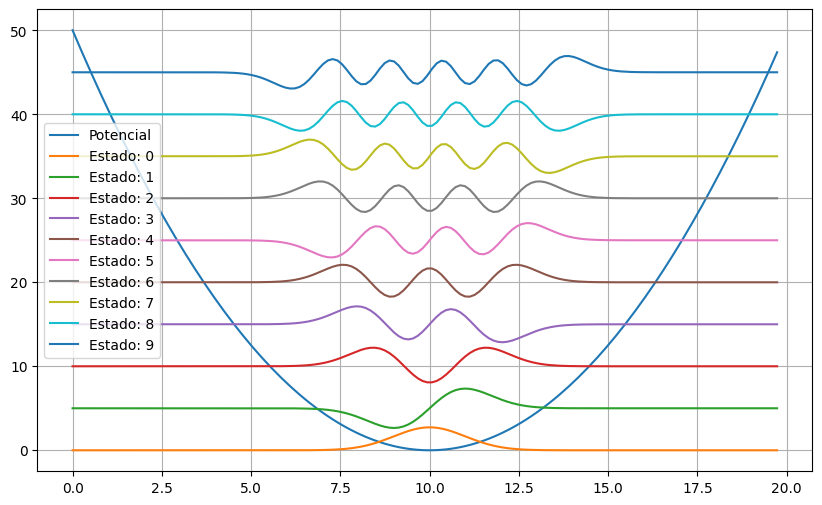

In [46]:
plt.figure(figsize=(10, 6))

V = potencial_oscilador_armonico(Rn)
plt.plot(Rn, V, label="Potencial")
for i in range(0, 10):
    plt.plot(Rn, - autovectores_osc[:,i]*10 + i*5, label=f"Estado: {i}")
plt.legend()
plt.grid()
plt.show()

Para la evolución temporal del oscilador armónico 

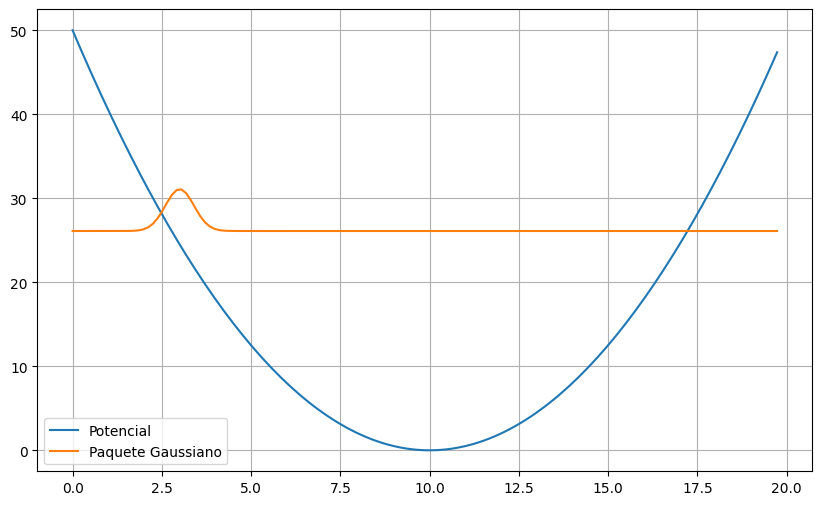

In [47]:
# Definición del paquete Gaussiano
def gauss(
        x,
        x0=3,
        sigma=0.4
):
    paquete = np.exp(- (x - x0)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

    return paquete

x0 = 3
paquete_gaussiano = gauss(Rn, x0)

plt.figure(figsize=(10,6))
plt.plot(Rn, V, label="Potencial")
plt.plot(Rn, paquete_gaussiano * 5 + V[x0]-20, label="Paquete Gaussiano")
plt.legend()
plt.grid()
plt.show()

In [48]:
def contantes_osc(n):
    # Factor de normalización
    factor = np.sqrt(L / (Ndvr + 1))
    
    # Calcular la suma
    suma = 0
    for i in range(0, Ndvr):
        # Distribución gaussiana en el punto Rdvr[i]
        gauss_value = gauss(Rn[i])
        
        # Componente i del eigenvector n
        eigenvec_component = autovectores_osc[n, i]
        
        # Sumar el término
        suma += gauss_value * eigenvec_component
    
    result = factor * suma
    return result

# Evolución temporal del paquete de ondas
def fdest(t,):
    """
    Función que calcula la suma de eigenvalores y eigenvectores exponenciados.
    
    Parameters:
    t : float - parámetro de tiempo
    Nm : int - dimensión de la matriz
    """
    
    # Calcular la suma
    result = 0
    for i in range(0, Ndvr):
        cons = contantes_osc(i)

        autovector = autovectores_osc[:,i]

        exponencial = np.exp(1j * ( - autovalores_osc[i]) * t)

        result += cons * autovector * exponencial 
    
    return result



In [50]:
t = np.linspace(0, 12, Ndvr)

psi = np.zeros((len(t), Ndvr))

for pos, i in enumerate(t):
    evolucion_paquete = fdest(i)
    psi[pos, :] = evolucion_paquete

    

C:\Users\samhu\AppData\Local\Temp\ipykernel_22348\3673242162.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  psi[pos, :] = evolucion_paquete


In [56]:
psi

array([[ 2.39352720e-03,  3.15073021e-03,  7.39788683e-03, ...,
         5.66284521e-02, -1.20022089e-02,  1.17461310e-02],
       [ 8.98970920e-03, -1.08977213e-02, -5.30622396e-03, ...,
         7.74836408e-02, -3.00591710e-02,  3.14860293e-02],
       [ 2.02342021e-02,  3.95931973e-02, -4.74064094e-02, ...,
        -3.09451102e-02, -7.88855019e-02, -1.80491718e-02],
       ...,
       [ 1.80140944e-03,  8.23534908e-05,  8.13574701e-03, ...,
         1.67467597e-03, -2.89684653e-02,  1.07173617e-02],
       [ 1.74954047e-02,  1.33316243e-02,  3.04815416e-02, ...,
         9.72999056e-02,  1.21854770e-01,  3.79406955e-03],
       [-3.74839152e-02,  9.45273180e-03, -2.97073283e-02, ...,
        -1.02155702e-01, -9.35741412e-02, -8.36994324e-02]],
      shape=(150, 150))

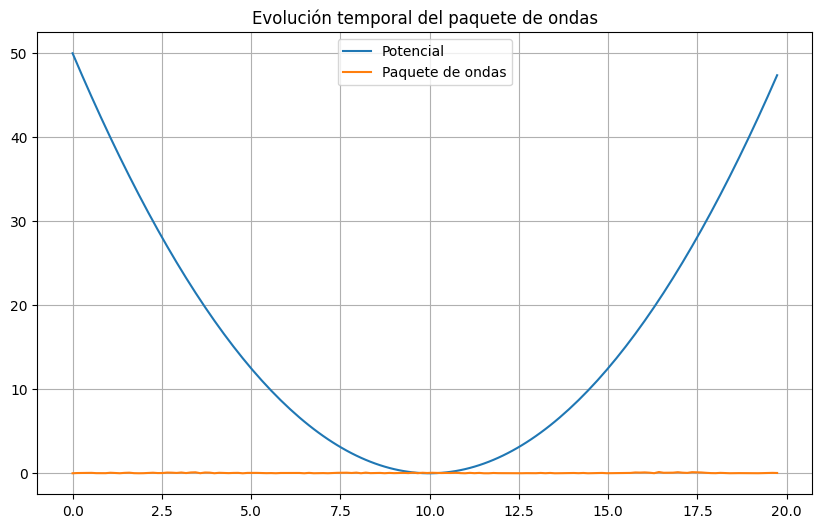

In [55]:
plt.figure(figsize=(10,6))
plt.plot(Rn, V, label="Potencial")
plt.plot(Rn, np.abs(psi[100]), label="Paquete de ondas")
plt.title("Evolución temporal del paquete de ondas")
plt.grid()
plt.legend()
plt.show()

# 4.

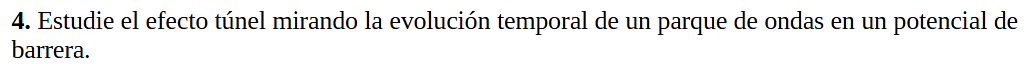

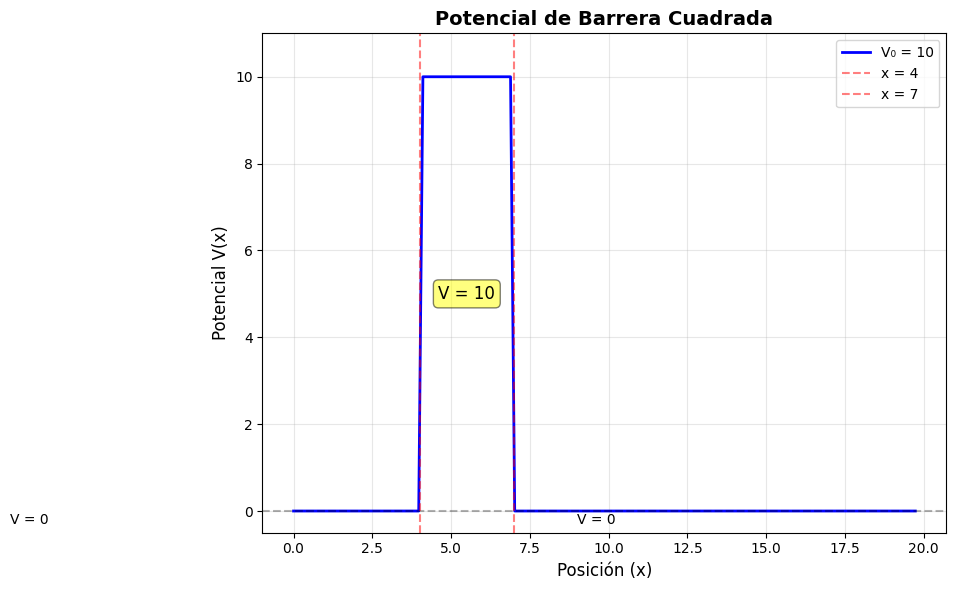

=== POTENCIAL DE BARRERA CUADRADA ===
Altura de la barrera (V₀): 10
Ancho de la barrera (b-a): 3
Rango de posiciones: [-10, 10]
Número de puntos: 1000

Potencial:
  V(x) = 0     para x < 4
  V(x) = 10    para 4 ≤ x ≤ 7
  V(x) = 0     para x > 7


In [24]:
# Definición del potencial en una barrera
def barrera_cuadrada(x, V0, a, b):
    """
    Crea un potencial de barrera cuadrada.
    
    Parámetros:
    -----------
    x : array
        Posiciones donde evaluar el potencial
    V0 : float
        Altura de la barrera
    a : float
        Inicio de la barrera
    b : float
        Fin de la barrera
    
    Retorna:
    --------
    V : array
        Valores del potencial en cada posición
    """
    V = np.zeros_like(x)
    V[(x >= a) & (x <= b)] = V0
    return V

# Parámetros de la barrera
x_min, x_max = -10, 10
N_points = 1000

# Configuración de la barrera
V0 = 10    # Altura de la barrera
a = 4    # Inicio de la barrera
b = 7     # Fin de la barrera

# Calcular el potencial
V = barrera_cuadrada(Rn, V0, a, b)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(Rn, V, 'b-', linewidth=2, label=f'V₀ = {V0}')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=a, color='r', linestyle='--', alpha=0.5, label=f'x = {a}')
plt.axvline(x=b, color='r', linestyle='--', alpha=0.5, label=f'x = {b}')

# Etiquetas y formato
plt.xlabel('Posición (x)', fontsize=12)
plt.ylabel('Potencial V(x)', fontsize=12)
plt.title('Potencial de Barrera Cuadrada', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim(-0.5, V0 + 1)

# Añadir anotaciones
plt.text((a+b)/2, V0/2, f'V = {V0}', 
         ha='center', va='center', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
plt.text(x_min + 1, -0.3, 'V = 0', fontsize=10)
plt.text(x_max - 1, -0.3, 'V = 0', fontsize=10)

plt.tight_layout()
plt.show()

# Imprimir información
print("=== POTENCIAL DE BARRERA CUADRADA ===")
print(f"Altura de la barrera (V₀): {V0}")
print(f"Ancho de la barrera (b-a): {b-a}")
print(f"Rango de posiciones: [{x_min}, {x_max}]")
print(f"Número de puntos: {N_points}")
print("\nPotencial:")
print(f"  V(x) = 0     para x < {a}")
print(f"  V(x) = {V0}    para {a} ≤ x ≤ {b}")
print(f"  V(x) = 0     para x > {b}")